**ANALIZANDO DIABETES EN MUJERES**

### Objetivo

Análisis estadístico multivariado sobre diabetes.

Construcción de un modelo que permita predecir si una mujer tiene diabetes en base a ciertas variables médicas.

Construcción de un modelo de aprendizaje automático para predecir con precisión si los pacientes del conjunto de datos tienen diabetes o no.

Implementar y evaluar modelos de clasificación en un problema concreto de clasificación binaria.

* Identificar y entrenar modelos adecuados en relación al tipo de variable objetivo (i.e. modelos de clasificación).
* Aplicar métodos de remuestreo (*cross-validation*) en el proceso de evaluación de los modelos ajustados.
* Utilizar métricas adecuadas para evaluar los distntos modelos empleados y compararlos con un modelo de referencia (*baseline*).
* Evaluar y seleccionar de forma sistemática los hiperparámetros adecuados para los modelos.

### Dataset

Para la realización de este trabajo vamos a utilizar un dataset de [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

Los datos corresponden a mujeres mayores de 20 años de edad de origen indio Pima.

La base de datos contiene varias variables predictoras médicas y una variable objetivo, Resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, nivel de insulina, edad, etc.


### Variables

| Nombre      | Descripción |
| ----------- | ----------- |
| **Outcome**  | 1: tested positive for diabetes - 0: tested negative for diabetes |      
| **Pregnancies**    | Number of times pregnant |
| **Glucose** | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| **BloodPressure**   | Diastolic blood pressure (mm Hg) |
| **SkinThickness**     | Triceps skin fold thickness (mm) |
| **Insulin**   | 2-Hour serum insulin (mu U/ml) |
| **BMI**  | Body mass index (weight in kg/(height in m)^2) |
| **DiabetesPedigreeFunction**   | Diabetes pedigree function |
| **Age**    | Age (years) |




Nota: Diabetes pedigree function provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. Scores the likelihood of diabetes based on family history.


[Codigos de referencia](https://www.kaggle.com/search?q=pima-indians-diabetes-database%2Fdiabetes.csv+in%3Adatasets+in%3Anotebooks)

## Parte 1: Análisis y visualización

In [ ]:
#Librerías:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np
from numpy import mean, std

#Para modelo regresión y clasificación
from sklearn.model_selection import train_test_split    #xa hacer division entrenamiento y test
from sklearn.linear_model import LinearRegression       #xa instanciar el modelo de regresión lineal
from sklearn.linear_model import LogisticRegression     #xa instanciar el modelo de regresión logística
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, fbeta_score, accuracy_score, f1_score, precision_score, recall_score  # métricas para evaluar
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix

from sklearn.pipeline import make_pipeline

#Perceptrón
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
import matplotlib.gridspec as gridspec
import xgboost as xgb
from xgboost import plot_importance

pd.options.mode.chained_assignment = None


In [ ]:
#Leemos el dataset
url = 'https://drive.google.com/file/d/1mEhfFIuxT1KUujXOHy7m7Nh5SUuGNYRC/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
df = pd.read_csv(path)
df.sample(5)

,pregnancies,glucose,bloodPressure,skinThickness,insulin,BMI,diabetesPedigreeFunction,age,outcome
448,0,104,64,37,64,33.6,0.510,22,1
457,5,86,68,28,71,30.2,0.364,24,0
344,8,95,72,0,0,36.8,0.485,57,0
240,1,91,64,24,0,29.2,0.192,21,0
392,1,131,64,14,415,23.7,0.389,21,0


In [ ]:
print('El set de datos contiene', df.shape[0], 'filas y', df.shape[1], 'columnas.')

El set de datos contiene 768 filas y 9 columnas.


El data set contiene 8 características o features y la variable outcome que es la variable objetivo.

In [ ]:
df.columns.tolist()

['pregnancies',
 'glucose',
 'bloodPressure',
 'skinThickness',
 'insulin',
 'BMI',
 'diabetesPedigreeFunction',
 'age',
 'outcome']

Para facilitar el análisis renombraremos las variables.

Llamaremos "diabetes" a la variable outcome, y para el resto utilizaremos su traducción al español.

In [ ]:
# Renombrando las variables (todos los encabezados de columnas)
df.columns = ['embarazos', 'glucosa', 'presionSanguinea', 'espesorPiel', 'insulina', 'IMC', 'funcionHerenciaFamiliar', 'edad', 'diabetes']

In [ ]:
#Información básica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   embarazos                768 non-null    int64  
 1   glucosa                  768 non-null    int64  
 2   presionSanguinea         768 non-null    int64  
 3   espesorPiel              768 non-null    int64  
 4   insulina                 768 non-null    int64  
 5   IMC                      768 non-null    float64
 6   funcionHerenciaFamiliar  768 non-null    float64
 7   edad                     768 non-null    int64  
 8   diabetes                 768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


El conjunto de datos tiene 768 filas. Todos los datos son numéricos. Aparentemente no faltan valores. Pero algunas celdas pueden estar codificadas con una entrada poco probable. Por ejemplo, 0 puede indicar un valor perdido para un dato numérico. 

In [ ]:
# Podemos resumir la cantidad de atributos de cada tipo
df.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [ ]:
# Exploramos algunas observaciones al azar del dataset
df.sample(10)

,embarazos,glucosa,presionSanguinea,espesorPiel,insulina,IMC,funcionHerenciaFamiliar,edad,diabetes
177,0,129,110,46,130,67.1,0.319,26,1
123,5,132,80,0,0,26.8,0.186,69,0
756,7,137,90,41,0,32.0,0.391,39,0
137,0,93,60,25,92,28.7,0.532,22,0
434,1,90,68,8,0,24.5,1.138,36,0
692,2,121,70,32,95,39.1,0.886,23,0
8,2,197,70,45,543,30.5,0.158,53,1
237,0,179,90,27,0,44.1,0.686,23,1
23,9,119,80,35,0,29.0,0.263,29,1
602,1,124,74,36,0,27.8,0.100,30,0


In [ ]:
#Visualizamos la cantidad de valores únicos de cada atributo.
df.nunique().sort_values()

diabetes                     2
embarazos                   17
presionSanguinea            47
espesorPiel                 51
edad                        52
glucosa                    136
insulina                   186
IMC                        248
funcionHerenciaFamiliar    517
dtype: int64

La variable **diabetes** presenta 2 valores únicos: 0 representa ausencia de diabetes y 1 presencia de diabetes.

# Visualización de datos
Visualizamos los datos para poder encontrar relaciones útiles y entender los datos que estamos analizando.

### Variable "objetivo"

#### Diabetes

La variable **diabetes** es una variable Nominal que representa dos categorías mutuamente excluyentes: tiene diabetes o no tiene diabetes. Se trata de una variable dicotómica.

In [ ]:
#Variable "diabetes"
print("La variable: diabetes, tiene", len(df.diabetes.unique ()), "etiquetas:")
print()
print(df.diabetes.unique ())

La variable: diabetes, tiene 2 etiquetas:

[1 0]


Hay dos clases como se esperaba, una paciente tiene diabetes o no la tiene.

In [ ]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

Como primer paso, observamos cómo se distribuye **diabetes** que es nuestra variable objetivo.

In [ ]:
df['diabetes'].describe() 

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diabetes, dtype: float64

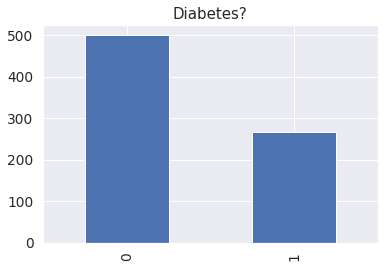

In [ ]:
#Gráfico de Barras de una variable   "ordena por eje ordenadas"
plot = df['diabetes'].value_counts().plot(kind='bar',
                                            title='Diabetes?')

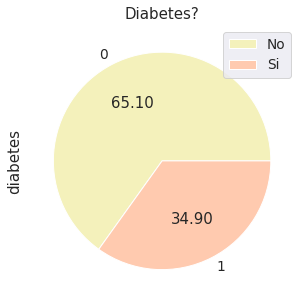

In [ ]:
#Gráfico de Torta de una variable
colores = ["#F4F1BB","#FFCAAF"]
plot = df['diabetes'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(5, 5),
                                            colors=colores,
                                            title='Diabetes?')
plt.legend(['No', 'Si'])
plt.show()

El 35% de las pacientes posee diabetes.

##Variables "features"

In [ ]:
df.loc[:, df.columns != 'diabetes'].describe()

,embarazos,glucosa,presionSanguinea,espesorPiel,insulina,IMC,funcionHerenciaFamiliar,edad
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Analizando la estadística descriptiva, nos hace pensar que podríamos estar en presencia de valores atípicos.

###Valores atípicos

Los valores atípicos ensucian la visualización y distorsionan los resultados al oscurecer el patrón de comportamiento del resto. 

Realizaremos el análisis de valores atípicos para cada característica. Usamos análisis de cuartiles para la detección de los mismos.

Para cada característica, analizaremos conjuntamente la distribución de la característica y el diagrama de caja para tener una idea de los valores atípicos.

Los valores atípicos se determinan utilizando los cuartiles superior e inferior y el recorrido intercurtilico.

In [ ]:
def plots(feature):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])    
    sns.distplot(df.loc[df["diabetes"]==0,feature],
                 kde = False, color = "#badfda", norm_hist=False,
                 hist_kws = dict(alpha=0.8), bins=30,
                 label="No Diabetes", ax=ax1);
    sns.distplot(df.loc[df["diabetes"]==1,feature],
                 kde = False, color = "#f8df81", norm_hist=False,
                 hist_kws = dict(alpha=0.6), bins=30,
                 label="Diabetes", ax=ax1);
    ax2 = fig.add_subplot(gs[0,3])    
    sns.boxplot(df[feature], orient="v", color = "#f6aa90",
                width = 0.2, ax=ax2);
    
    ax1.legend(loc="upper right");

Vemos los valores extremos atípicos en cada variable

### Embarazos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

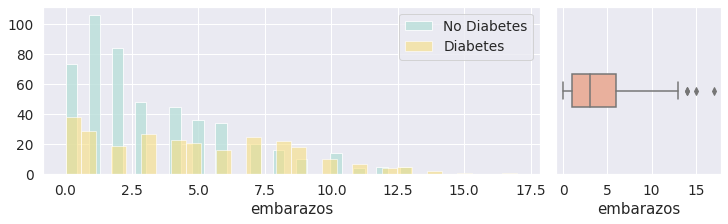

In [ ]:
plots("embarazos")

Para la característica embarazos, hay algunas medidas por encima del bigote superior.

In [ ]:
#Consideramos valores outliers cuando se encuentren por debajo y encima de 1,5 RIQ respecto del quartil 1 y 3 respectivamente.
Q1=df.embarazos.quantile(q=0.25)
Q3=df.embarazos.quantile(q=0.75)
LSO=Q3+1.5*(Q3-Q1)
LIO=Q1-1.5*(Q3-Q1)
print(LIO,Q1,Q3,LSO)

-6.5 1.0 6.0 13.5


In [ ]:
#Consultamos la cantidad de valores por encima del limite superior definido
pd.value_counts(df['embarazos']> LSO.sum()).sort_index()

False    764
True       4
Name: embarazos, dtype: int64

En el df hay 4 observaciones con valores para la variable embarazos mayores a limite superior definido.

Estos son eventos raros. Los reemplazamos con el 95º cuantil. Y graficamos.

In [ ]:
Q95º=df.embarazos.quantile(q=0.95)

df.embarazos = np.where(df.embarazos > LSO,
                                  Q95º, df.embarazos)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

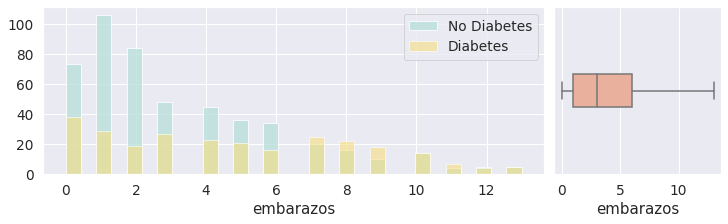

In [ ]:
plots("embarazos")

###**Glucosa**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

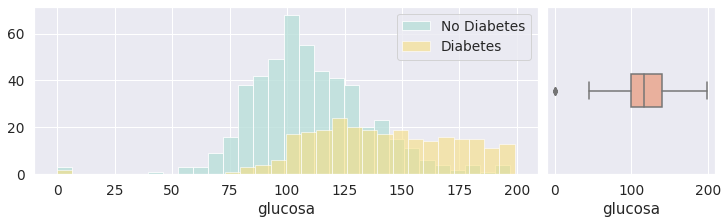

In [ ]:
plots('glucosa')

Observamos algunos valores 0 para la característica glucosa.

In [ ]:
enCero = df['glucosa']==0
df_cero = df[enCero]
len(df_cero)

5

Consideramos los valores 0 como datos faltantes y los reemplazamos por la mediana.

In [ ]:
med = df["glucosa"].median()
df["glucosa"] = np.where(df["glucosa"] == 0, med, df["glucosa"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

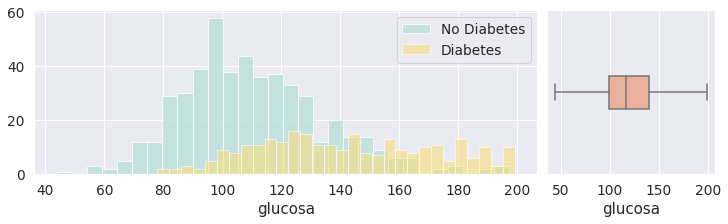

In [ ]:
plots('glucosa')

###**Presion Sanguinea** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

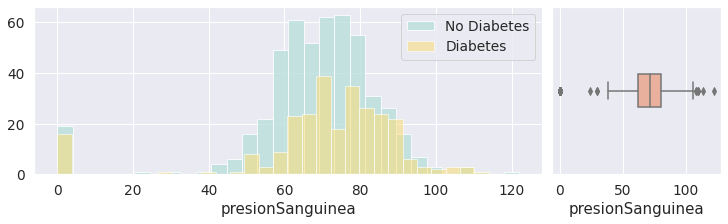

In [ ]:
plots('presionSanguinea')

Observamos valores 0 para la característica presión sanguínea, lo cual es poco probable. Al igual que hicimos con la característica glucosa, los reemplazamos por la mediana. 

In [ ]:
enCero = df['presionSanguinea']==0
df_cero = df[enCero]
len(df_cero)

35

In [ ]:
med = df["presionSanguinea"].median()
df["presionSanguinea"] = np.where(df["presionSanguinea"] == 0, med, df["presionSanguinea"])

In [ ]:
#Consideramos valores outliers cuando se encuentren por debajo y encima de 1,5 RIQ respecto del quartil 1 y 3 respectivamente.
Q1=df.presionSanguinea.quantile(q=0.25)
Q3=df.presionSanguinea.quantile(q=0.75)
LSO=Q3+1.5*(Q3-Q1)
LIO=Q1-1.5*(Q3-Q1)
print(LIO,Q1,Q3,LSO)

40.0 64.0 80.0 104.0


Observamos también la presencia de valores por debajo y por encima de los límites definidos.

In [ ]:
#Consultamos la cantidad de valores por debajo del limite superior definido
pd.value_counts(df['presionSanguinea']< LIO.sum()).sort_index()

False    764
True       4
Name: presionSanguinea, dtype: int64

In [ ]:
#Consultamos la cantidad de valores por encima del limite superior definido
pd.value_counts(df['presionSanguinea']> LSO.sum()).sort_index()

False    758
True      10
Name: presionSanguinea, dtype: int64

Reemplazamos los valores inferiores a LIO por el quinto cuantil y reemplazamos los valores superiores a LSO por el 95º cuantil.

In [ ]:
Q5º=df.presionSanguinea.quantile(q=0.05)
Q95º=df.presionSanguinea.quantile(q=0.95)

df.presionSanguinea = np.where(df.presionSanguinea < LIO,
                                  Q5º, df.presionSanguinea)
df.presionSanguinea = np.where(df.presionSanguinea > LSO,
                                  Q95º, X.presionSanguinea)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

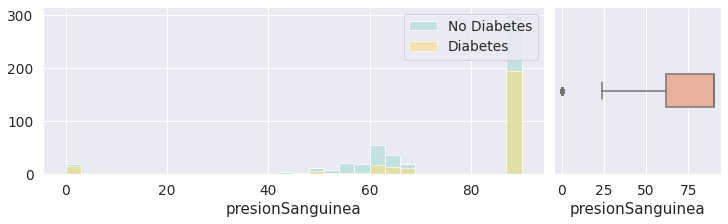

In [ ]:
plots('presionSanguinea')

###**Espesor Piel** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

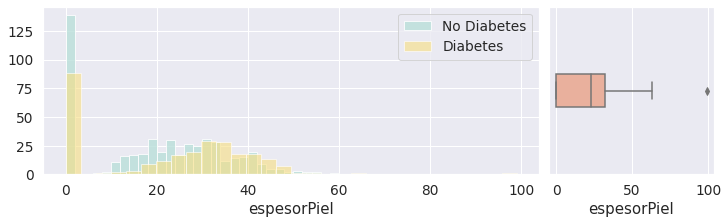

In [ ]:
plots("espesorPiel")

Observamos valores 0 para la característica espesor de la piel, lo cual es poco probable. Los reemplazamos por la mediana. 

In [ ]:
enCero = df['espesorPiel']==0
df_cero = df[enCero]
len(df_cero)

227

In [ ]:
med = df["espesorPiel"].median()
df["espesorPiel"] = np.where(df["espesorPiel"] == 0, med, df["espesorPiel"])

In [ ]:
#Consideramos valores outliers cuando se encuentren por debajo y encima de 1,5 RIQ respecto del quartil 1 y 3 respectivamente.
Q1=df.espesorPiel.quantile(q=0.25)
Q3=df.espesorPiel.quantile(q=0.75)
LSO=Q3+1.5*(Q3-Q1)
LIO=Q1-1.5*(Q3-Q1)
print(LIO,Q1,Q3,LSO)

9.5 23.0 32.0 45.5


Observamos también la presencia de valores por debajo y por encima de los límites definidos.

In [ ]:
#Consultamos la cantidad de valores por debajo del limite superior definido
pd.value_counts(df['espesorPiel']< LIO.sum()).sort_index()

False    764
True       4
Name: espesorPiel, dtype: int64

In [ ]:
#Consultamos la cantidad de valores por encima del limite superior definido
pd.value_counts(df['espesorPiel']> LSO.sum()).sort_index()

False    737
True      31
Name: espesorPiel, dtype: int64

Reemplazamos los valores inferiores a LIO por el quinto cuantil y reemplazamos los valores superiores a LSO por el 95º cuantil.

In [ ]:
Q5º=df.espesorPiel.quantile(q=0.05)
Q95º=df.espesorPiel.quantile(q=0.95)

df.espesorPiel = np.where(df.espesorPiel < LIO,
                                  Q5º, df.espesorPiel)
df.espesorPiel = np.where(df.espesorPiel > LSO,
                                  Q95º, df.espesorPiel)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

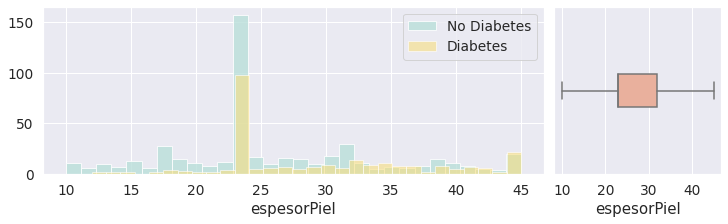

In [ ]:
plots('espesorPiel')

###**Insulina** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

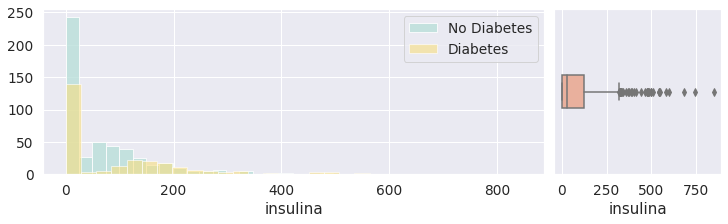

In [ ]:
plots('insulina')

Observamos que la característica insulina tiene valores 0, lo que es poco probable. Dado que la mediana es cercana a 0, los reemplazamos con el cuantil 60.

In [ ]:
enCero = df['insulina']==0
df_cero = df[enCero]
len(df_cero)

374

In [ ]:
Q60=df.insulina.quantile(q=0.60)
df["insulina"] = np.where(df["insulina"] == 0, Q60, df["insulina"])

In [ ]:
#Consideramos valores outliers cuando se encuentren por debajo y encima de 1,5 RIQ respecto del quartil 1 y 3 respectivamente.
Q1=df.insulina.quantile(q=0.25)
Q3=df.insulina.quantile(q=0.75)
LSO=Q3+1.5*(Q3-Q1)
LIO=Q1-1.5*(Q3-Q1)
print(LIO,Q1,Q3,LSO)

-10.375000000000028 72.19999999999999 127.25 209.82500000000002


Observamos también la presencia de valores por encima de los límites definidos.

In [ ]:
#Consultamos la cantidad de valores por encima del limite superior definido
pd.value_counts(df['insulina']> LSO.sum()).sort_index()

False    688
True      80
Name: insulina, dtype: int64

Reemplazamos los valores superiores a LSO por el 95º cuantil.

In [ ]:
Q95º=df.insulina.quantile(q=0.95)

df.insulina = np.where(df.insulina > LSO,
                                  Q95º, df.insulina)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

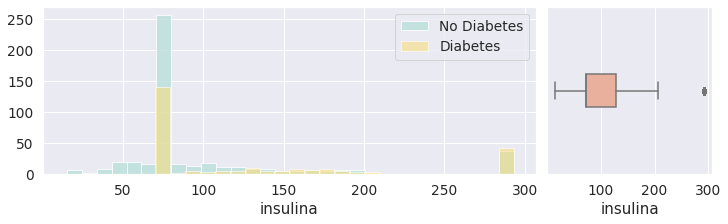

In [ ]:
plots('insulina')

###**IMC** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

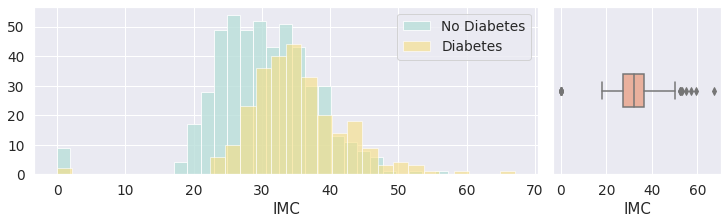

In [ ]:
plots('IMC')

Observamos que la característica IMC tiene valores 0, lo que es poco probable. Los reemplazamos con la mediana.

In [ ]:
enCero = df['IMC']==0
df_cero = df[enCero]
len(df_cero)

11

In [ ]:
med = df["IMC"].median()
df["IMC"] = np.where(df["IMC"] == 0, med, df["IMC"])

In [ ]:
#Consideramos valores outliers cuando se encuentren por debajo y encima de 1,5 RIQ respecto del quartil 1 y 3 respectivamente.
Q1=df.IMC.quantile(q=0.25)
Q3=df.IMC.quantile(q=0.75)
LSO=Q3+1.5*(Q3-Q1)
LIO=Q1-1.5*(Q3-Q1)
print(LIO,Q1,Q3,LSO)

13.849999999999998 27.5 36.6 50.25


Observamos también la presencia de valores por encima de los límites definidos.

In [ ]:
#Consultamos la cantidad de valores por encima del limite superior definido
pd.value_counts(df['IMC']> LSO.sum()).sort_index()

False    760
True       8
Name: IMC, dtype: int64

Reemplazamos los valores superiores a LSO por el 95º cuantil.

In [ ]:
Q95º=df.IMC.quantile(q=0.95)

df.IMC = np.where(df.IMC > LSO, Q95º, df.IMC)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

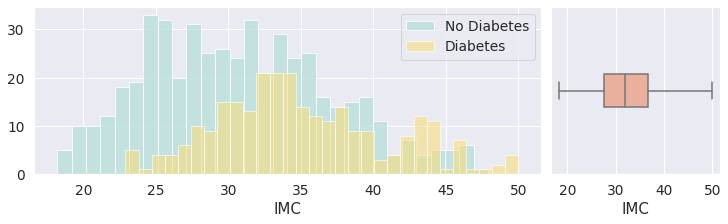

In [ ]:
plots('IMC')

###**Funcion Herencia Familiar** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

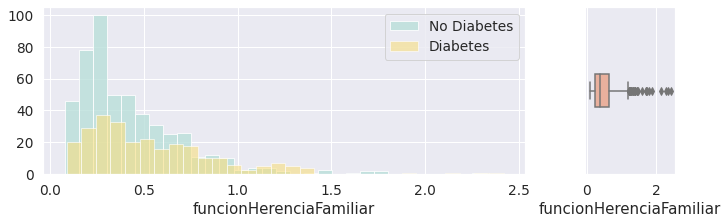

In [ ]:
plots('funcionHerenciaFamiliar')

In [ ]:
#Consideramos valores outliers cuando se encuentren por debajo y encima de 1,5 RIQ respecto del quartil 1 y 3 respectivamente.
Q1=df.funcionHerenciaFamiliar.quantile(q=0.25)
Q3=df.funcionHerenciaFamiliar.quantile(q=0.75)
LSO=Q3+1.5*(Q3-Q1)
LIO=Q1-1.5*(Q3-Q1)
print(LIO,Q1,Q3,LSO)

-0.32999999999999996 0.24375 0.62625 1.2


Observamos la presencia de valores por encima de los límites definidos.

In [ ]:
#Consultamos la cantidad de valores por encima del limite superior definido
pd.value_counts(df['funcionHerenciaFamiliar']> LSO.sum()).sort_index()

False    739
True      29
Name: funcionHerenciaFamiliar, dtype: int64

Reemplazamos los valores superiores a LSO por el 95º cuantil.

In [ ]:
Q95º=df.funcionHerenciaFamiliar.quantile(q=0.95)

df.funcionHerenciaFamiliar = np.where(df.funcionHerenciaFamiliar > LSO, Q95º, df.funcionHerenciaFamiliar)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

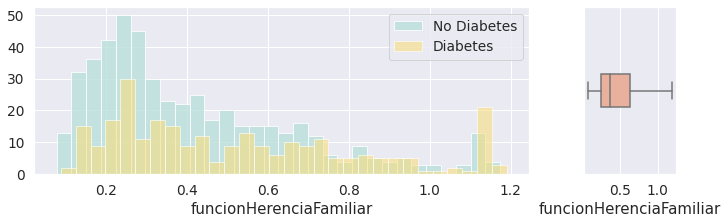

In [ ]:
plots('funcionHerenciaFamiliar')

###**Edad** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

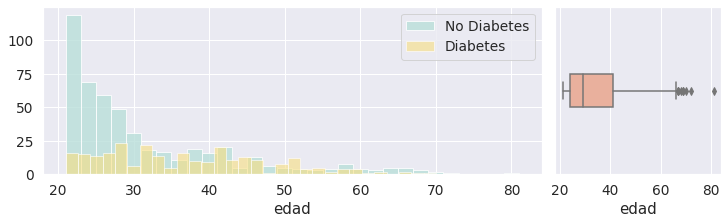

In [ ]:
plots('edad')

In [ ]:
#Consideramos valores outliers cuando se encuentren por debajo y encima de 1,5 RIQ respecto del quartil 1 y 3 respectivamente.
Q1=df.edad.quantile(q=0.25)
Q3=df.edad.quantile(q=0.75)
LSO=Q3+1.5*(Q3-Q1)
LIO=Q1-1.5*(Q3-Q1)
print(LIO,Q1,Q3,LSO)

-1.5 24.0 41.0 66.5


Observamos la presencia de valores por encima de los límites definidos.

In [ ]:
#Consultamos la cantidad de valores por encima del limite superior definido
pd.value_counts(df['edad']> LSO.sum()).sort_index()

False    759
True       9
Name: edad, dtype: int64

Reemplazamos los valores superiores a LSO por el 95º cuantil.

In [ ]:
Q95º=df.edad.quantile(q=0.95)

df.edad = np.where(df.edad > LSO, Q95º, df.edad)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: 

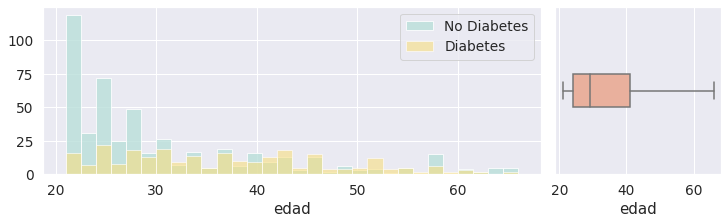

In [ ]:
plots('edad')

Volvemos a obtener las medidas descriptivas y a graficar para ver como mejoraron

In [ ]:
df.describe()

,embarazos,glucosa,presionSanguinea,espesorPiel,insulina,IMC,funcionHerenciaFamiliar,edad,diabetes
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.00000,768.000000
mean,3.819010,121.656250,76.317708,27.08125,110.101302,32.328073,0.456378,33.10026,0.348958
std,3.300635,30.438286,22.197657,8.27352,71.868536,6.529133,0.279224,11.37607,0.476951
min,0.000000,44.000000,0.000000,10.00000,14.000000,18.200000,0.078000,21.00000,0.000000
25%,1.000000,99.750000,62.000000,23.00000,72.200000,27.500000,0.243750,24.00000,0.000000
50%,3.000000,117.000000,90.000000,23.00000,72.200000,32.000000,0.372500,29.00000,0.000000
75%,6.000000,140.250000,90.000000,32.00000,127.250000,36.600000,0.626250,41.00000,1.000000
max,13.000000,199.000000,90.000000,45.00000,293.000000,50.000000,1.191000,66.00000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

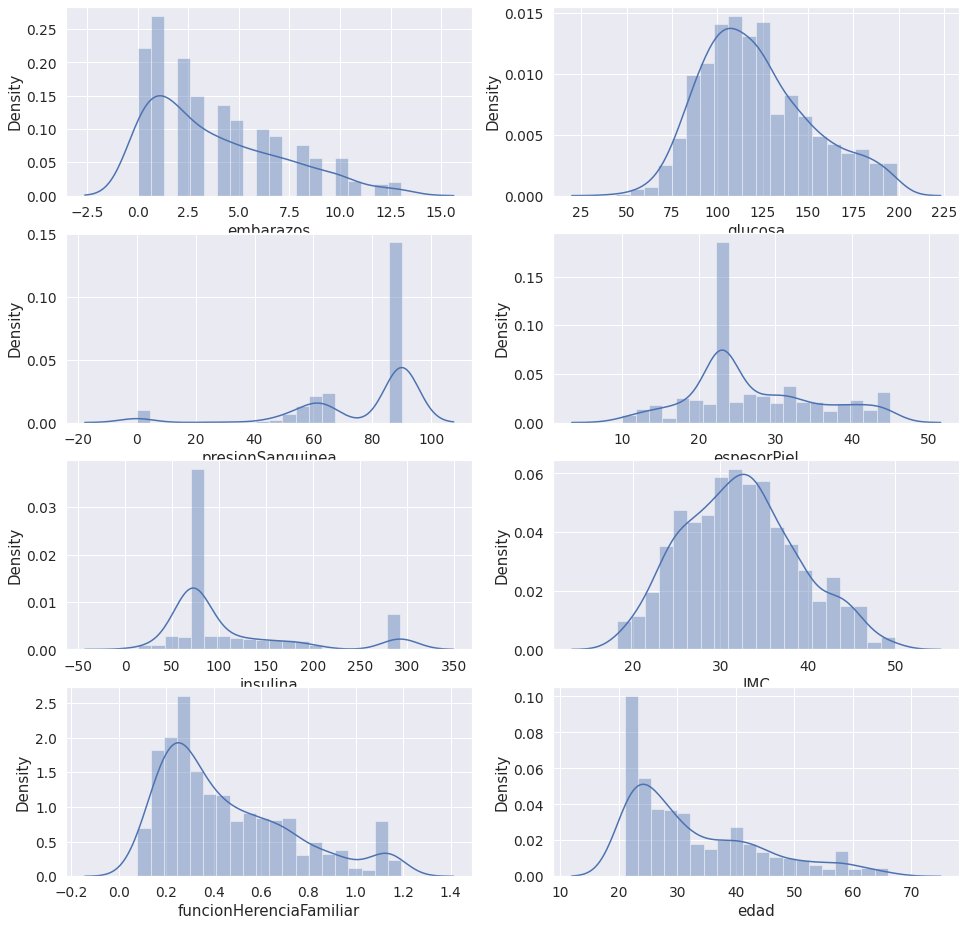

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.embarazos, bins = 20, ax=ax[0,0])
sns.distplot(df.glucosa, bins = 20, ax=ax[0,1]) 
sns.distplot(df.presionSanguinea, bins = 20, ax=ax[1,0]) 
sns.distplot(df.espesorPiel, bins = 20, ax=ax[1,1])
sns.distplot(df.insulina, bins = 20, ax=ax[2,0])
sns.distplot(df.IMC, bins = 20, ax=ax[2,1])
sns.distplot(df.funcionHerenciaFamiliar, bins = 20, ax=ax[3,0])
sns.distplot(df.edad, bins = 20, ax=ax[3,1]) 

In [ ]:
# Visualizamos nuevamente
import plotly.express as px

df_new = df[['embarazos', 'glucosa', 'presionSanguinea', 'espesorPiel', 'insulina', 'IMC', 'funcionHerenciaFamiliar', 'edad']]
fig = px.box(df_new.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

# Análisis bivariado: Observamos variable objetivo y resto de las variables  

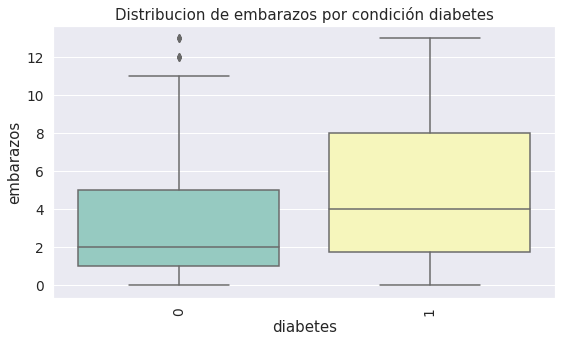

In [ ]:
# Distribucion de embarazos por condición diabetes
fig, ax = plt.subplots(figsize=(9, 5))
sns.set_theme(font_scale=1.25)
ax= sns.boxplot(x="diabetes", y="embarazos",data=df,  palette="Set3")
ax.set(xlabel='diabetes', ylabel='embarazos')
ax.set_title("Distribucion de embarazos por condición diabetes")
plt.xticks(rotation=90)
plt.show()

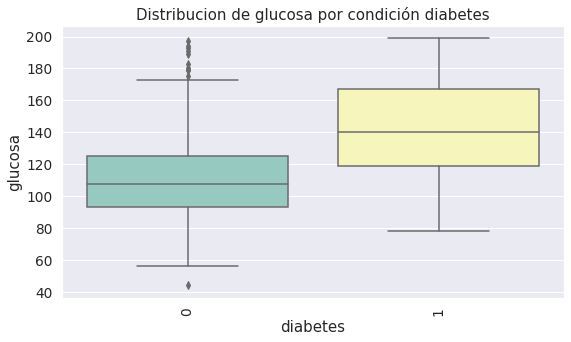

In [ ]:
# Distribucion de glucosa por condición diabetes
fig, ax = plt.subplots(figsize=(9, 5))
sns.set_theme(font_scale=1.25)
ax= sns.boxplot(x="diabetes", y="glucosa",data=df,  palette="Set3")
ax.set(xlabel='diabetes', ylabel='glucosa')
ax.set_title("Distribucion de glucosa por condición diabetes")
plt.xticks(rotation=90)
plt.show()

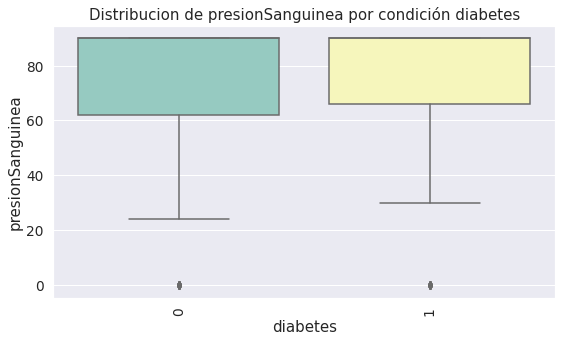

In [ ]:
# Distribucion de presionSanguinea por condición diabetes
fig, ax = plt.subplots(figsize=(9, 5))
sns.set_theme(font_scale=1.25)
ax= sns.boxplot(x="diabetes", y="presionSanguinea",data=df,  palette="Set3")
ax.set(xlabel='diabetes', ylabel='presionSanguinea')
ax.set_title("Distribucion de presionSanguinea por condición diabetes")
plt.xticks(rotation=90)
plt.show()

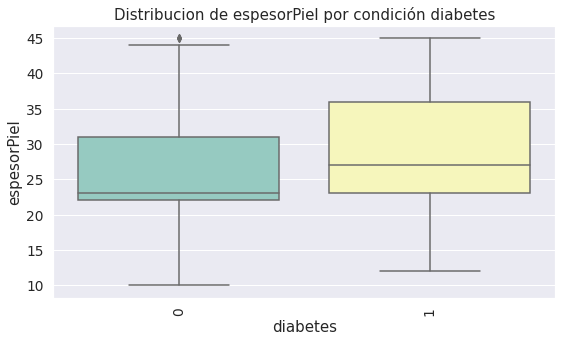

In [ ]:
# Distribucion de espesorPiel por condición diabetes
fig, ax = plt.subplots(figsize=(9, 5))
sns.set_theme(font_scale=1.25)
ax= sns.boxplot(x="diabetes", y="espesorPiel",data=df,  palette="Set3")
ax.set(xlabel='diabetes', ylabel='espesorPiel')
ax.set_title("Distribucion de espesorPiel por condición diabetes")
plt.xticks(rotation=90)
plt.show()

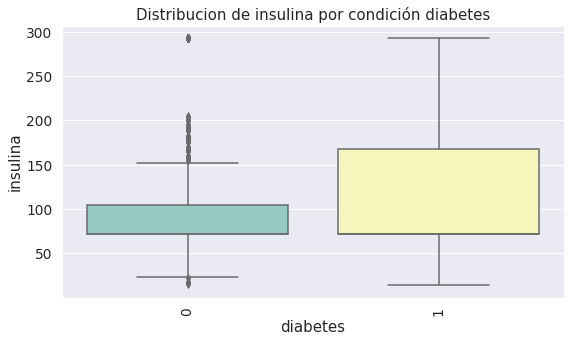

In [ ]:
# Distribucion de insulina por condición diabetes
fig, ax = plt.subplots(figsize=(9, 5))
sns.set_theme(font_scale=1.25)
ax= sns.boxplot(x="diabetes", y="insulina",data=df,  palette="Set3")
ax.set(xlabel='diabetes', ylabel='insulina')
ax.set_title("Distribucion de insulina por condición diabetes")
plt.xticks(rotation=90)
plt.show()

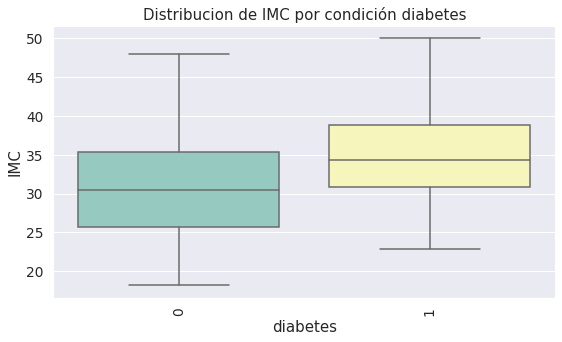

In [ ]:
# Distribucion de IMC por condición diabetes
fig, ax = plt.subplots(figsize=(9, 5))
sns.set_theme(font_scale=1.25)
ax= sns.boxplot(x="diabetes", y="IMC",data=df,  palette="Set3")
ax.set(xlabel='diabetes', ylabel='IMC')
ax.set_title("Distribucion de IMC por condición diabetes")
plt.xticks(rotation=90)
plt.show()

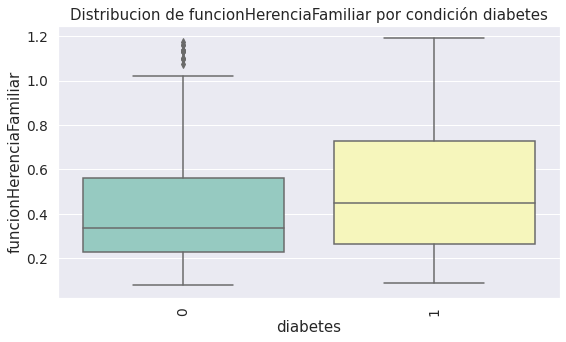

In [ ]:
# Distribucion de funcionHerenciaFamiliar por condición diabetes
fig, ax = plt.subplots(figsize=(9, 5))
sns.set_theme(font_scale=1.25)
ax= sns.boxplot(x="diabetes", y="funcionHerenciaFamiliar",data=df,  palette="Set3")
ax.set(xlabel='diabetes', ylabel='funcionHerenciaFamiliar')
ax.set_title("Distribucion de funcionHerenciaFamiliar por condición diabetes")
plt.xticks(rotation=90)
plt.show()

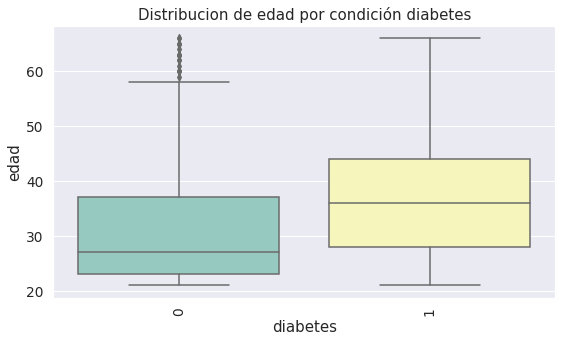

In [ ]:
# Distribucion de edad por condición diabetes
fig, ax = plt.subplots(figsize=(9, 5))
sns.set_theme(font_scale=1.25)
ax= sns.boxplot(x="diabetes", y="edad",data=df,  palette="Set3")
ax.set(xlabel='diabetes', ylabel='edad')
ax.set_title("Distribucion de edad por condición diabetes")
plt.xticks(rotation=90)
plt.show()

Analizamos la correlación entre las variables

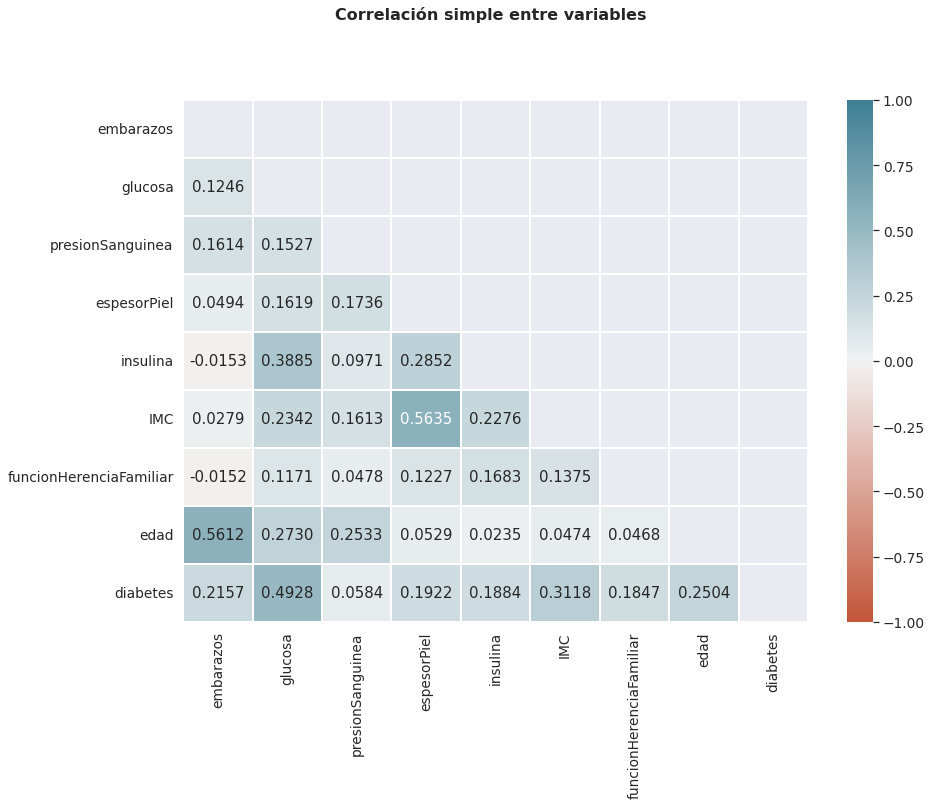

In [ ]:
#matriz de correlaciones
fig, ax = plt.subplots(figsize = (14, 10))
fig.suptitle("Correlación simple entre variables", fontsize = 16, fontweight = "bold", x = 0.43)
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), ax = ax, cmap = sns.diverging_palette(20, 220, n=256), annot = True,  fmt=".4f", vmin=-1, vmax=1, linewidth = 1, center=0, mask=mask)    #otras opciones: cmap="RdBu_r" cmap = "twilight_shifted" cmap = sns.diverging_palette(20, 220, n=256)
plt.subplots_adjust(top = 0.85)                                                 
plt.show()

Obervamos que la variable diabetes está positivamente correlacionada con las demás variables.

Siendo las correlaciones positivas mayores con la variable glucosa, IMC, edad y embarazos.

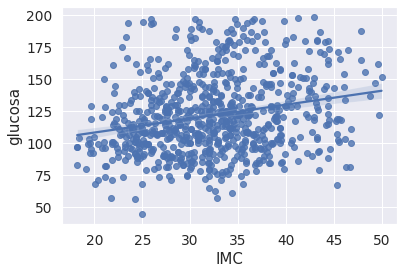

In [ ]:
sns.regplot(x='IMC', y= 'glucosa', data=df)

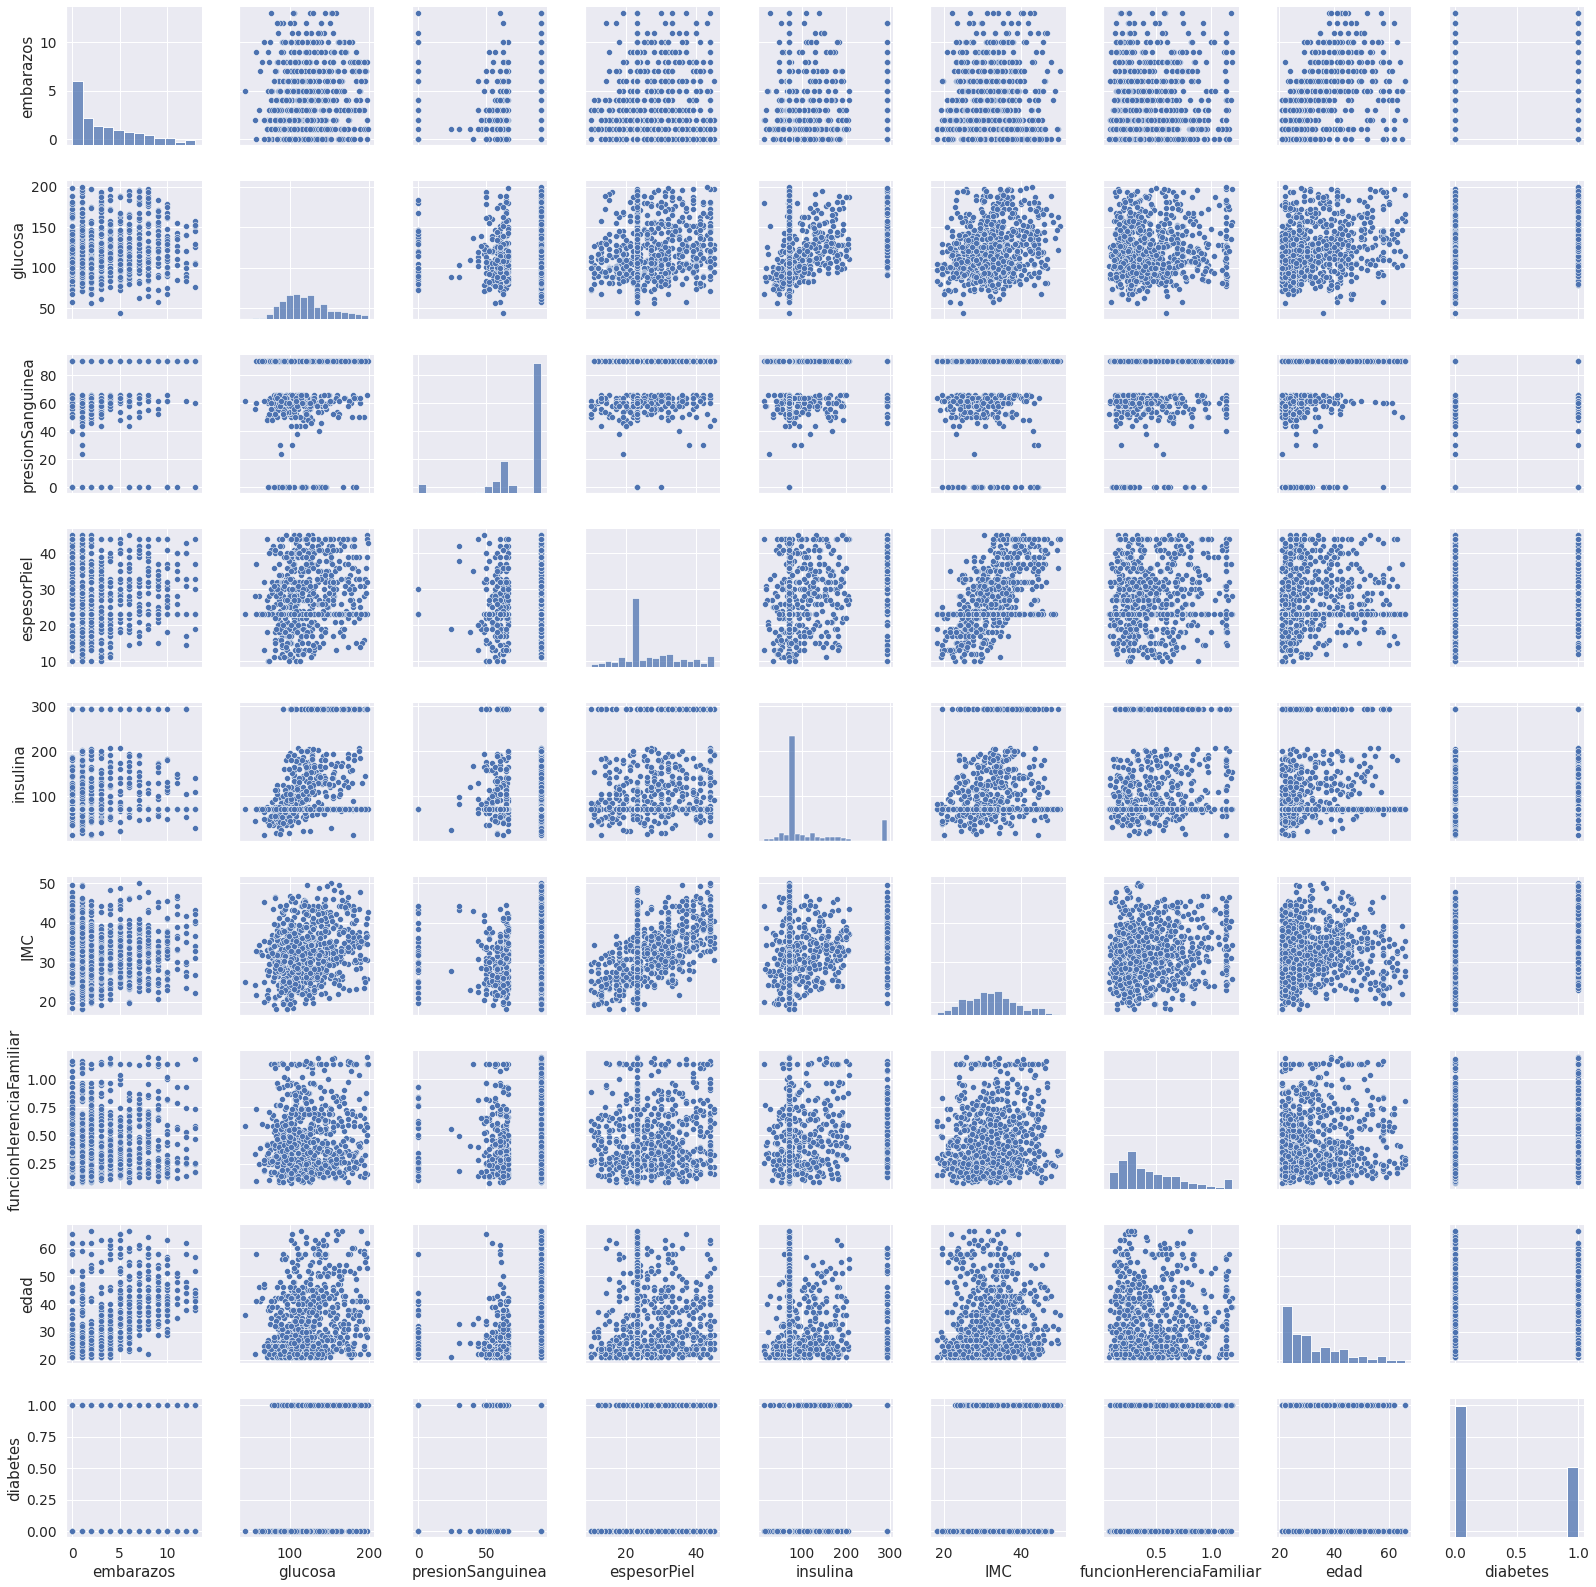

In [ ]:
sns.pairplot(df)

## Inferencias sobre la poblacion

Realizamos inferencias sobre la población en base a nuestra muestra de datos.

#MODELO PREDICTIVO

##MODELO REGRESIÓN LINEAL

OBJETIVO: construir modelo de regresión que permita predecir niveles de glucosa partiendo de diferentes atributos médicos de la paciente.

Trataremos la variable diabetes como vector *one-hot*

In [ ]:
pd.get_dummies(df['diabetes'], prefix='diabetes')

,diabetes_0,diabetes_1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
763,1,0
764,1,0
765,1,0
766,0,1


In [ ]:
columns=['diabetes']
df_encoded = pd.get_dummies(data=df, columns=columns)
df_encoded

,embarazos,glucosa,presionSanguinea,espesorPiel,insulina,IMC,funcionHerenciaFamiliar,edad,diabetes_0,diabetes_1
0,6.0,148.0,72.0,35.0,72.2,33.6,0.62700,50.0,0,1
1,1.0,85.0,66.0,29.0,72.2,26.6,0.35100,31.0,1,0
2,8.0,183.0,64.0,23.0,72.2,23.3,0.67200,32.0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.16700,21.0,1,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.13285,33.0,0,1
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,44.0,180.0,32.9,0.17100,63.0,1,0
764,2.0,122.0,70.0,27.0,72.2,36.8,0.34000,27.0,1,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.24500,30.0,1,0
766,1.0,126.0,60.0,23.0,72.2,30.1,0.34900,47.0,0,1


**Con la version df_encoded del df original obtenemos el dataset sobre el que vamos a trabajar**

In [ ]:
# Separamos la variable objetivo del resto (es decir, dividimos el dataset en "X e Y" )
glucosa = df_encoded[['glucosa']]                      # Y
df_encoded.drop('glucosa', axis=1, inplace= True)      # X

####Con **una variable**

Gráfico dispersión variables elegidas:


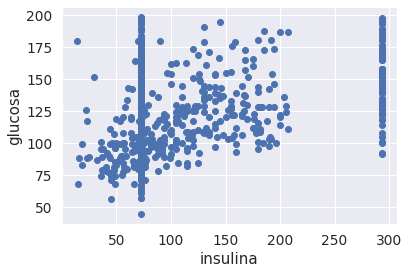


Tamaño muestras:
X Train size:  (614, 1)
X Test size:  (154, 1)
Y Train size:  (614, 1)
Y Test size:  (154, 1)

Métrica:
MSE: 765.0962429900615

Precisión del modelo:
0.16114656491141632



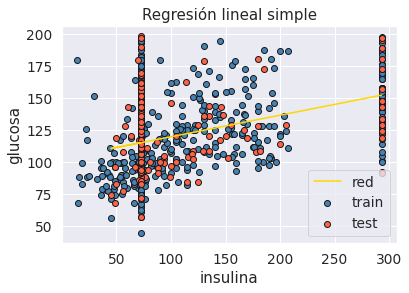

In [ ]:
#Elegimos una feature

X = df[['insulina']]   
y = df[['glucosa']]

print('Gráfico dispersión variables elegidas:')
plt.scatter(X,y)
plt.xlabel("insulina")
plt.ylabel("glucosa")
plt.show()
print()

# Generamos el split train/test usando la función train_test_split:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, shuffle=True, random_state=1234)  #separamos el dataset en un conjunto de entrenamiento (80%) y un conjunto de test (20%)
print('Tamaño muestras:')
print("X Train size: ", X_train.shape)
print("X Test size: ", X_test.shape)
print("Y Train size: ", y_train.shape)
print("Y Test size: ", y_test.shape)
print()


# Instanciamos y ajustamos el modelo
lr = LinearRegression()
lr.fit(X_train, y_train)    

# Generamos la predicción
y_pred = lr.predict(X_test)

# Usamos algunas métricas para imprimir el error
print('Métrica:')
print('MSE:', mean_squared_error(y_test, y_pred))
print()

print('Precisión del modelo:')
print(lr.score(X_train, y_train))   
print()

# Graficamos los puntos de entrenamiento

plt.scatter(X_train, y_train, facecolor = "steelblue", edgecolor = "k", label = "train")

# Graficamos los puntos de test
plt.scatter(X_test, y_test, facecolor="tomato", edgecolor="k", label="test")

# Graficamos la recta de regresión
plt.plot(X_test, y_pred, color="gold", label="red")

plt.legend()
plt.title('Regresión lineal simple')
plt.xlabel("insulina")
plt.ylabel("glucosa")

plt.show()
print()

In [ ]:
print('Datos del modelo de regresión lineal')
print()
print('Valor de la pendiente:')
print(lr.coef_)
print()
print('Valor de la intersección:')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x', '+', lr.intercept_)

Datos del modelo de regresión lineal

Valor de la pendiente:
[[0.16891505]]

Valor de la intersección:
[102.93190314]

La ecuación del modelo es igual a:
y =  [[0.16891505]] x + [102.93190314]




#### Repetimos con más de una features

La idea es ver si a medida que agregamos features el error disminuye.

In [ ]:
features = ['insulina','edad'] 
X =  df[features] 
y = df[['glucosa']]

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, shuffle=True, random_state=1234)
lr = LinearRegression()
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('Precisión del modelo:')
print(lr.score(X_train, y_train))   
print()

MSE: 686.0680268778804
Precisión del modelo:
0.22551000204521587



In [ ]:
features = ['insulina', 'IMC', 'edad'] 
X =  df[features] 
y = df[['glucosa']]

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, shuffle=True, random_state=1234)
lr = LinearRegression()
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('Precisión del modelo:')
print(lr.score(X_train, y_train))   
print()

MSE: 672.0805750242529
Precisión del modelo:
0.24537895662452824



In [ ]:
features = ['embarazos', 'presionSanguinea', 'espesorPiel', 'insulina', 'IMC', 'funcionHerenciaFamiliar', 'edad'] 
X =  df[features] 
y = df[['glucosa']]

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, shuffle=True, random_state=1234)
lr = LinearRegression()
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('Precisión del modelo:')
print(lr.score(X_train, y_train))   
print()

MSE: 686.419582240513
Precisión del modelo:
0.2522489546889841



##MODELO REGRESIÓN POLINOMIAL

Probamos modelo de regresión polinomial para verificar si se ajusta mejor a nuestro set de datos.

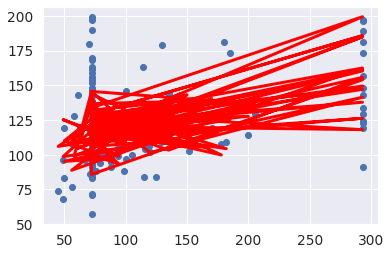

Métrica:
MSE: 874.1255966398923

Precisión del modelo:
0.21818178990835357



In [ ]:
X_p =  df[['insulina']]
y_p = df[['glucosa']]


#Separamos los datos de train en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split (X_p,y_p, test_size=0.2, shuffle=True, random_state=1234) 

#Se define el grado del polinomio
poli_reg = PolynomialFeatures (degree = 2) #fijo el grado en 2 y después vamos subiendo poco a poco, cuidado con sobreajuste
#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)
#Defino el algoritmo a utilizar
pr = LinearRegression()
#Entreno el modelo
pr.fit(X_train_poli, y_train_p)
#Realizo una predicción
y_pred_pr = pr.predict(X_test_poli)


#GRaficamos los datos junto al modelo
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, y_pred_pr, color='red', linewidth=3)
plt.show()
    
# Usar métrica para imprimir el error
print('Métrica:')
print('MSE:', mean_squared_error(y_test_p, y_pred_pr))
print()


print('Precisión del modelo:')
print(pr.score(X_train_poli, y_train_p))   #R2
print()

Tamaño muestras:
X_trainval size:  (614, 1)
X_test size:  (154, 1)


[]

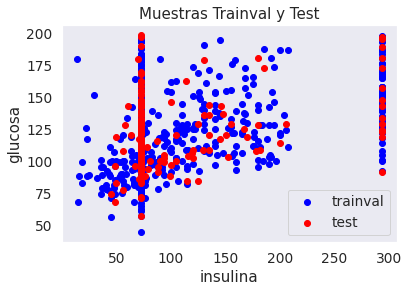

In [ ]:
X = df[['insulina']]
y = df[['glucosa']]
X_trainval, X_test, y_trainval, y_test = train_test_split (X,y, test_size=0.2, shuffle=True, random_state=1234) 

print('Tamaño muestras:')
print("X_trainval size: ", X_trainval.shape)
print("X_test size: ", X_test.shape)

# graficamos estos subconjuntos (disjuntos)
plt.scatter(X_trainval, y_trainval, color="blue", label="trainval")
plt.scatter(X_test, y_test, color="red", label="test")
plt.legend()
plt.grid()
plt.title("Muestras Trainval y Test")
plt.xlabel("insulina")
plt.ylabel("glucosa")
plt.plot()

Tamaño muestras:
X_train size:  (491, 1)
X_val size:  (123, 1)


[]

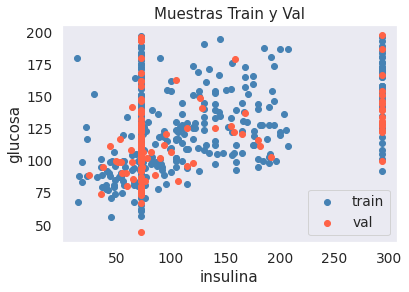

In [ ]:
#Para hacer ajuste de los hiperparámetros debemos contar con un conjunto auxiliar de validación. 
#Para ello repetiremos el proceso de indexado aleatorio y particionado sobre el conjunto trainval
X_train, X_val, y_train, y_val = train_test_split (X_trainval,y_trainval, test_size=0.2, shuffle=True, random_state=1234) 

print('Tamaño muestras:')
print("X_train size: ", X_train.shape)
print("X_val size: ", X_val.shape)

# graficamos estos subconjuntos (disjuntos)
plt.scatter(X_train, y_train, color="steelblue", label="train")
plt.scatter(X_val, y_val, color="tomato", label="val")
plt.legend()
plt.grid()
plt.title("Muestras Train y Val")
plt.xlabel("insulina")
plt.ylabel("glucosa")
plt.plot()

In [ ]:
#Se define el grado del polinomio
#poli_reg = PolynomialFeatures (degree = 2) #fijo el grado en 2 y después vamos subiendo poco a poco, cuidado con sobreajuste
#Se transforma las características existentes en características de mayor grado
#X_train_poli = poli_reg.fit_transform(X_train)
#X_test_poli = poli_reg.fit_transform(X_test)
#Defino el algoritmo a utilizar
#pr = LinearRegression()
#Entreno el modelo
#pr.fit(X_train_poli, y_train_p)
#Realizo una predicción
#y_pred_pr = pr.predict(X_test_poli)

#MODELO CLASIFICACIÓN

Las características se asignan a X y las etiquetas correspondientes a la variable objetivo diabetes a y. 

In [ ]:
#División entre variables predictoras y predichas
X = df.loc[:, df.columns != 'diabetes']
y = df[['diabetes']]

print(X.shape)
print(y.shape)

(768, 8)
(768, 1)


##MODELO REGRESIÓN LOGÍSTICA

Buscaremos predecir si una paciente tiene diabetes o no en relación a la variable diabetes:

* 1: Diabetes positivo
* 0: Diabetes negativo

##Vamos a entrenar y evaluar un modelo de regresión logística

Como vimos, el dataset está desbalanceado: hay menos ejemplos de la clase 1.

In [ ]:
from collections import Counter
# Resumen de la distribución de clases en la variable diabetes
target = df['diabetes']
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Clase=%d, Frecuencia=%d, Porcentaje=%.3f%%' % (k, v, per))

Clase=1, Frecuencia=268, Porcentaje=34.896%
Clase=0, Frecuencia=500, Porcentaje=65.104%


Dividimos el conjunto de datos en conjuntos de entrenamiento y test. Usamos el parámetro de estratificación de la función train_test_split para obtener la misma distribución de clases.

In [ ]:
#división del dataset en conjuntos de entrenamiento y evaluación con la función "train_test_split()"
#usamos el argumento "stratify" para conservar la misma proporción de clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=12345, stratify = y)

In [ ]:
#Comprobamos con una función Counter que los conjuntos de entrenamiento y test tiene la misma proporción de clases

counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Clase=%d, Frecuencia=%d, Porcentaje=%.3f%%' % (k, v, per))

TypeError: ignored

In [ ]:
y_train.hist()

In [ ]:
counter = Counter(y_test)
for k,v in counter.items():
	per = v / len(y_test) * 100
	print('Clase=%d, Frecuencia=%d, Porcentaje=%.3f%%' % (k, v, per))

In [ ]:
y_test.hist()

In [ ]:
# Instanciamos el modelo
model_LR =  LogisticRegression(random_state=100)

In [ ]:
# Ajustamos el modelo
model_LR.fit(X_train, y_train)

**Evaluamos**

In [ ]:
# Evaluamos el modelo considerando cross validation de manera estratificada y repetida 

#F2
def f2(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=2)

def evaluate_model(X, y, model):
	# Definimos el tipo de conformación de los pliegues (fold/interaciones)
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)  #ESTO NOS PERMITE CONSERVAR LA PROPORCIÓN DE LA CLASE 1 y 0
	# Definimos la métrica de evaluación del modelo
	metric = make_scorer(f2)
	# Evaluación del modelo
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return mean(scores), std(scores)
 
scores = evaluate_model(X_train, y_train, model_LR)
print('Media F2: %.3f (%.3f)' % scores)

print()

#ACCURACY
def accuracy(y_true, y_pred):
	return accuracy_score(y_true, y_pred)

def evaluate_model(X, y, model):
	# Definimos el tipo de conformación de los pliegues (fold/interaciones)
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)  #ESTO NOS PERMITE CONSERVAR LA PROPORCIÓN DE LA CLASE 1 y 0
	# Definimos la métrica de evaluación del modelo
	metric = make_scorer(accuracy)
	# Evaluación del modelo
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return mean(scores), std(scores)
 
scores = evaluate_model(X_train, y_train, model_LR)
print('Media Accuracy: %.3f (%.3f)' % scores)

print()

#PRECISION
def precision(y_true, y_pred):
	return precision_score(y_true, y_pred)

def evaluate_model(X, y, model):
	# Definimos el tipo de conformación de los pliegues (fold/interaciones)
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)  #ESTO NOS PERMITE CONSERVAR LA PROPORCIÓN DE LA CLASE 1 y 0
	# Definimos la métrica de evaluación del modelo
	metric = make_scorer(precision)
	# Evaluación del modelo
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return mean(scores), std(scores)
 
scores = evaluate_model(X_train, y_train, model_LR)
print('Media Precision: %.3f (%.3f)' % scores)

print()

#RECALL
def recall(y_true, y_pred):
	return recall_score(y_true, y_pred)

def evaluate_model(X, y, model):
	# Definimos el tipo de conformación de los pliegues (fold/interaciones)
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)  #ESTO NOS PERMITE CONSERVAR LA PROPORCIÓN DE LA CLASE 1 y 0
	# Definimos la métrica de evaluación del modelo
	metric = make_scorer(recall)
	# Evaluación del modelo
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return mean(scores), std(scores)
 
scores = evaluate_model(X_train, y_train, model_LR)
print('Media Recall: %.3f (%.3f)' % scores)

print()

# Realizamos la matriz de confusión
y_pred = model_LR.predict(X_test)
plot_confusion_matrix(estimator=model_LR, X=X_test, y_true=y_test,
                      cmap='Blues')

# Perceptrón Simple

Utilizaremos Perceptrón para la clasificación de patrones de diabetes.

El Perceptrón multicapa (MLPClassifier) se utiliza para predecir si una paciente tiene diabetes basándose en un conjunto de variables de diagnóstico.

Definiciones

Creamos la frontera de decisión:

In [ ]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean) #OrRd_r)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Greys)

In [ ]:
#División entre variables predictoras y predichas
X, y = df.iloc[:, 1:], df.diabetes

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
class_list = list(set(y))
class_list

In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
df.columns = df.columns.astype(str)
g = sns.lmplot(x='1', # Horizontal axis
           y='0', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="diabetes", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}); # S marker size

In [ ]:
clf = Perceptron(max_iter=10, tol=0.0001, eta0=0.1, random_state=0)